# Importando as bibliotecas

In [55]:
import pandas as pd
import plotly.express as px
import missingno as msno

# Importando as bases de dados

## Base de dados

Base de dados loja de jogos on-line.

In [56]:
dados = pd.DataFrame(pd.read_csv("../0_bases_originais/original.csv"))

In [57]:
dados

,nome,porcentagem_desconto,preço,tipo
0,Resident Evil 4,-12%,"R$ 218,99",Padrão
1,Star Wars Empire at War - Gold Pack,0,"R$ 37,99",Padrão
2,LEGO Indiana Jones: The Original Adventures,0,"R$ 37,99",Padrão
3,Fallout Classic Collection,0,Indisponivel,Pacote
4,LEGO Indiana Jones 2: The Adventure Continues,0,"R$ 37,99",Padrão
...,...,...,...,...
95,Naruto Shippuden: Ultimate Ninja STORM Revolution,-85%,"R$ 8,39",Padrão
96,Resident Evil Revelations,0,"R$ 59,99",Padrão
97,Enigma do Medo,-9%,"R$ 49,99",Pré-Venda
98,Xbox - Cartão Presente Digital 70 Reais,0,"R$ 70,00",Padrão


In [58]:
# verificando o tamanho da base em linhas e colunas
dados.shape

(100, 4)

# Primeiros tratamentos

## Resetando o index e eliminando os duplicados

In [59]:
dados.index.value_counts()

0     1
63    1
73    1
72    1
71    1
     ..
30    1
29    1
28    1
27    1
99    1
Length: 100, dtype: int64

In [60]:
dados.reset_index(drop=True).index.value_counts()

0     1
63    1
73    1
72    1
71    1
     ..
30    1
29    1
28    1
27    1
99    1
Length: 100, dtype: int64

In [61]:
dados.duplicated().sum()

0

In [62]:
dados.loc[dados.nome.duplicated()==True]

,nome,porcentagem_desconto,preço,tipo


In [63]:
# criando um novo objeto dados, resetando o index do objeto anterior e eliminando duplicados
dados = dados.reset_index(drop=True).drop_duplicates()
dados.shape

(100, 4)

## Retirando variáveis

No pandas, utilizamos o comando .drop para eliminar as colunas que não pretendemos trabalhar.

In [64]:
#Não será necessário remoção de colunas

## Editando os nomes das colunas

### Nomes das colunas em minusculo

In [65]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preço', 'tipo'], dtype='object')

In [66]:
dados.columns = dados.columns.str.lower()

### Substituindo caracteres especiais das colunas

In [67]:
dados.columns = dados.columns.str.replace('ç', 'c')

In [68]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preco', 'tipo'], dtype='object')

### Substituindo caracteres especiais das linhas de colunas específicas

In [69]:
dados.preco=dados.preco.str.replace('\W','')
dados.preco=dados.preco.str.replace('R','')

/var/folders/8x/pgz7jkdx7bs0zwwqtp4pglv00000gn/T/ipykernel_68865/1570654488.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



### Substituindo caracteres especiais de toda a base de dados

In [70]:
dados = dados.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                ':' : '',
                '-' : '',
                "’" : "",
                "'" : "",
                "/" : "",
                "%" : "",
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o"               
              }, regex=True)

## Convertendo preços para númerico

In [71]:
dados.preco = pd.to_numeric(dados.preco, errors='coerce')

## Dados Missing

<Axes: >

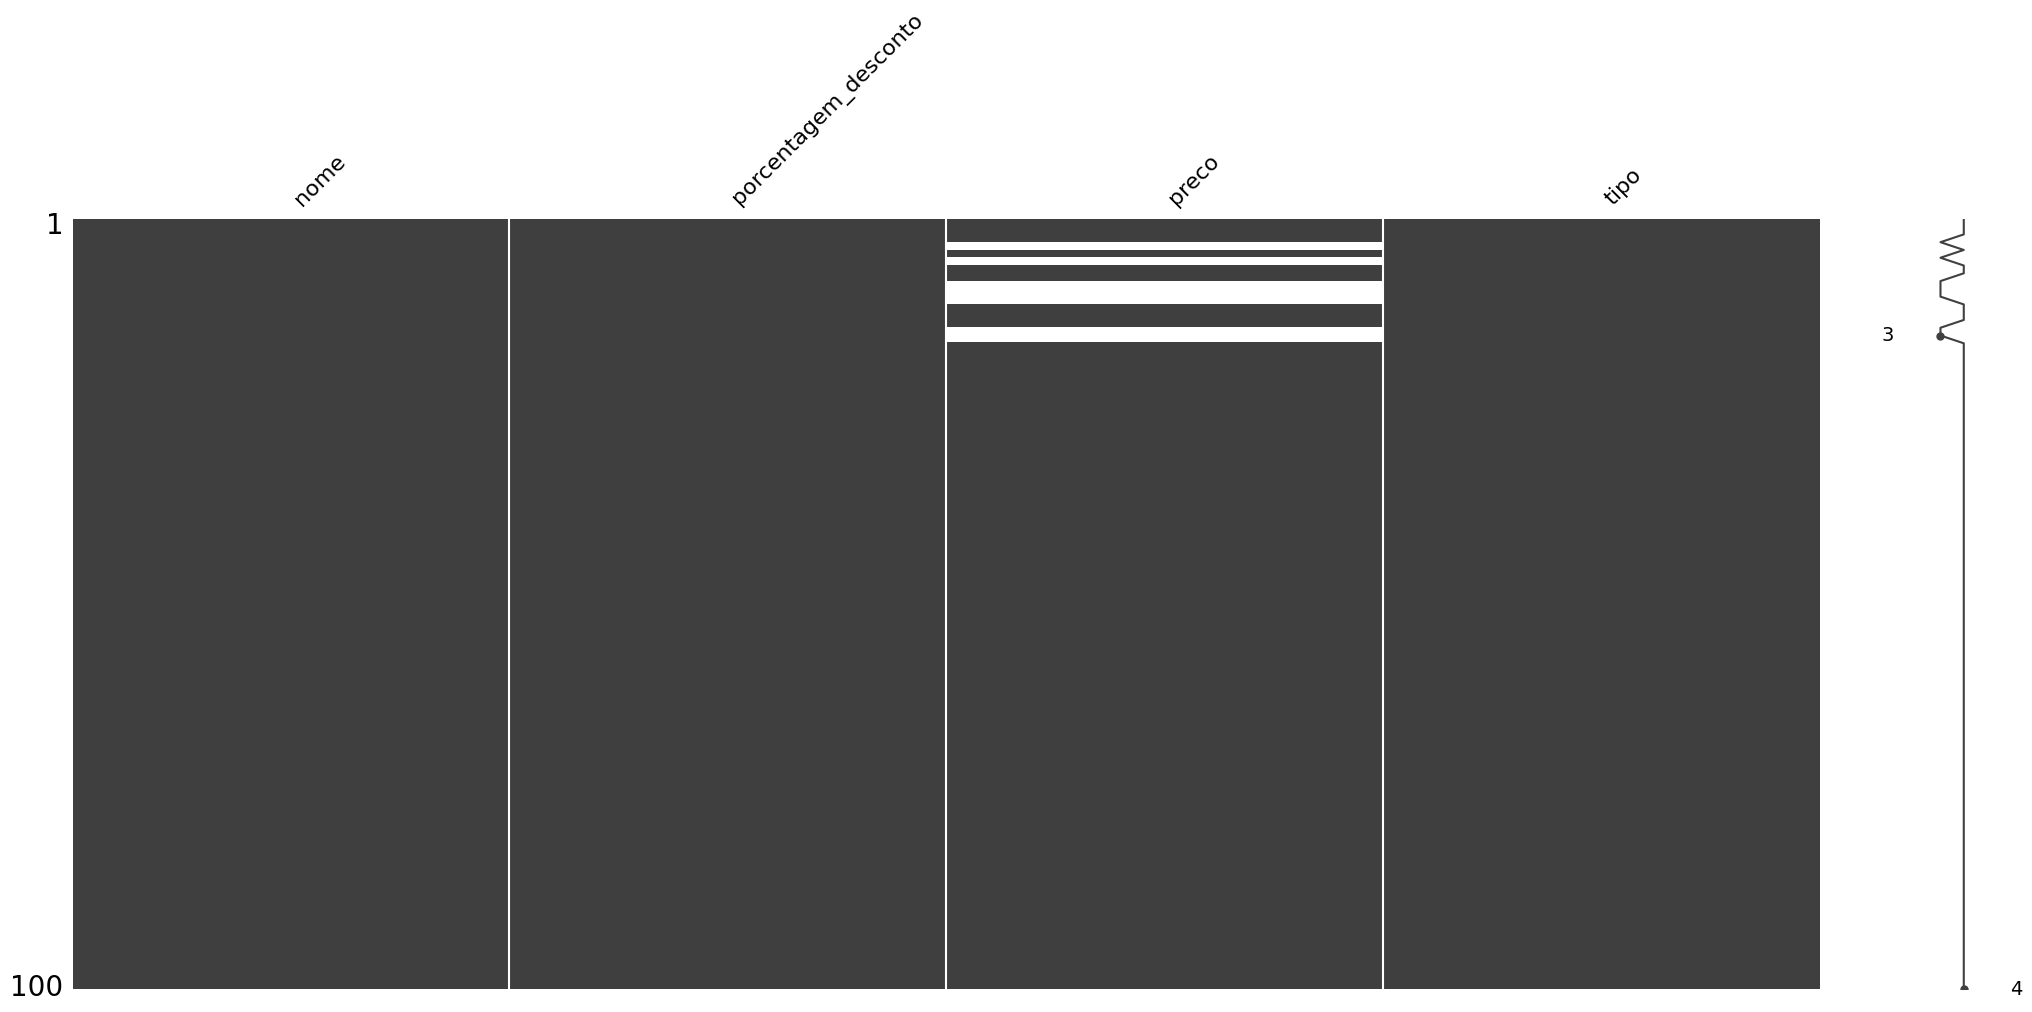

In [72]:
msno.matrix(dados)

<Axes: >

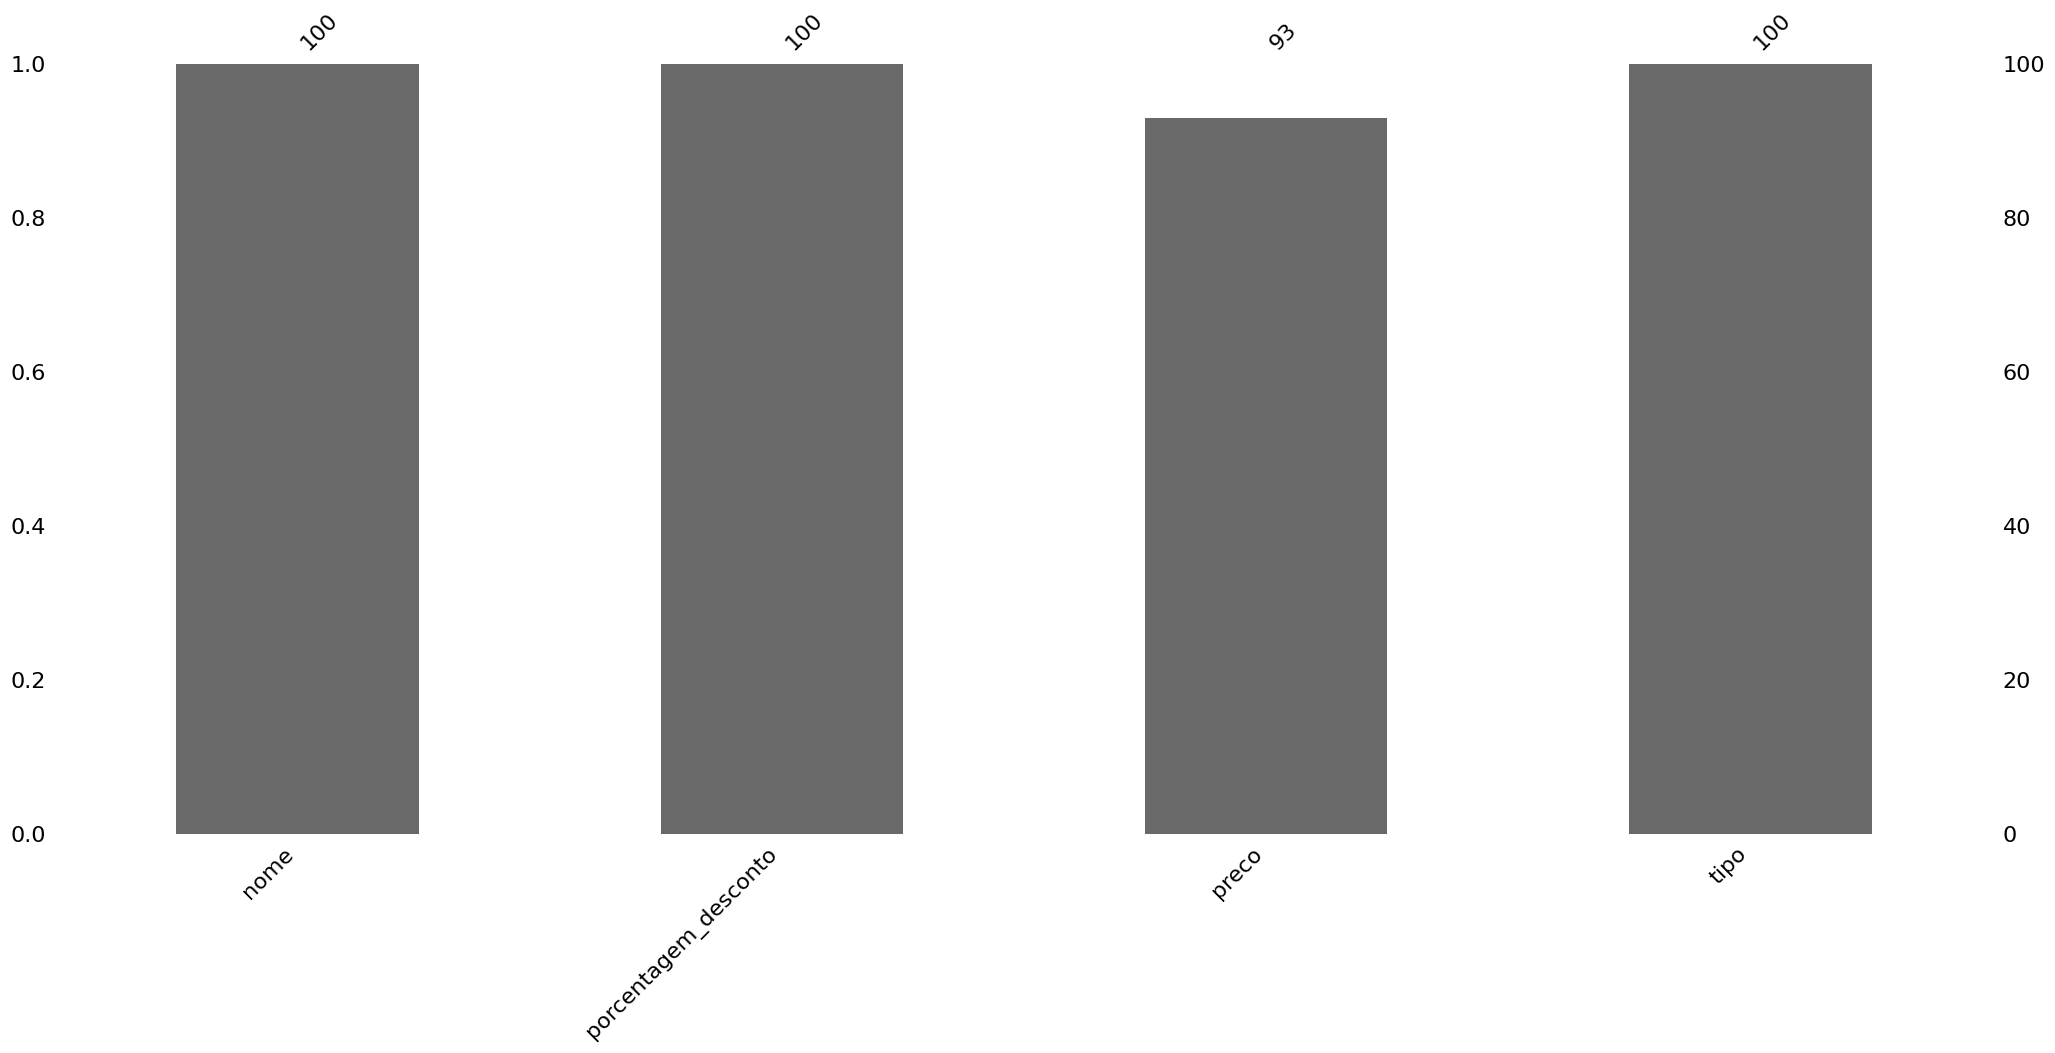

In [73]:
msno.bar(dados)

### Justificativa da remoção de dados nulos
Em análise dos dados, entendemos que os itens que retornaram indisponíveis da raspagem de dados, não fariam sentido serem expostos ou estarem contidos na base tratada.

In [74]:
dados = dados.dropna()
dados.isna().sum()

nome                    0
porcentagem_desconto    0
preco                   0
tipo                    0
dtype: int64

### Resetando index

In [75]:
dados = dados.reset_index(drop=True)
dados

,nome,porcentagem_desconto,preco,tipo
0,Resident Evil 4,12,21899.0,Padrao
1,Star Wars Empire at War Gold Pack,0,3799.0,Padrao
2,LEGO Indiana Jones The Original Adventures,0,3799.0,Padrao
3,LEGO Indiana Jones 2 The Adventure Continues,0,3799.0,Padrao
4,Star Wars The Force Unleashed II,0,3799.0,Padrao
...,...,...,...,...
88,Naruto Shippuden Ultimate Ninja STORM Revolution,85,839.0,Padrao
89,Resident Evil Revelations,0,5999.0,Padrao
90,Enigma do Medo,9,4999.0,PreVenda
91,Xbox Cartao Presente Digital 70 Reais,0,7000.0,Padrao


### Transformando o preço para valor monetário

In [76]:
dados['preco'] = dados['preco'].div(100)
dados.preco

0     218.99
1      37.99
2      37.99
3      37.99
4      37.99
       ...  
88      8.39
89     59.99
90     49.99
91     70.00
92     40.00
Name: preco, Length: 93, dtype: float64

## Tranformando texto para lower case e criando padrão de uso

In [77]:
dados.nome = dados.nome.str.lower()
dados.tipo = dados.tipo.str.lower()
dados

,nome,porcentagem_desconto,preco,tipo
0,resident evil 4,12,218.99,padrao
1,star wars empire at war gold pack,0,37.99,padrao
2,lego indiana jones the original adventures,0,37.99,padrao
3,lego indiana jones 2 the adventure continues,0,37.99,padrao
4,star wars the force unleashed ii,0,37.99,padrao
...,...,...,...,...
88,naruto shippuden ultimate ninja storm revolution,85,8.39,padrao
89,resident evil revelations,0,59.99,padrao
90,enigma do medo,9,49.99,prevenda
91,xbox cartao presente digital 70 reais,0,70.00,padrao


## Tratamento de Outlier

Ao realizar análise dos outlier da base, verificamos que apesar de fora do desvio padrão, estes dados não deveriam ser descartados, uma vez que representam o valor real do item.

In [78]:
px.box(dados.preco)

## Salvar base de dados tratadas

In [79]:
dados.to_csv("../1_bases_tratadas/base_tratada.csv", index=True)